In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift

In [5]:
# Load the dataset
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Checking for data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset.shape

(200, 5)

In [8]:
df = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

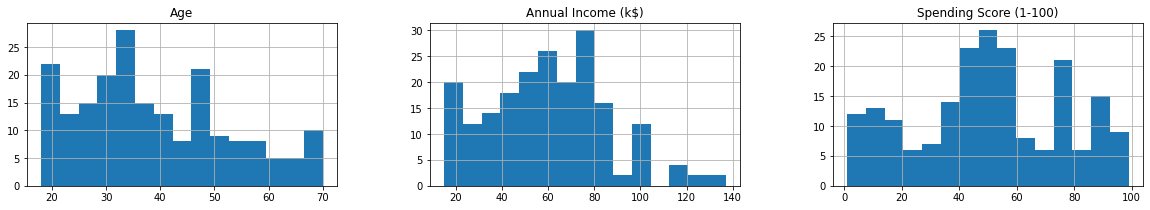

In [10]:
# EDA for the numerical features
df.hist(bins=15, figsize=(20,3), layout=(1,3))

In [11]:
fig = px.scatter_matrix(df, width=800, height=800)
fig.show()

In [12]:
fig1 = px.scatter(df, x='Age', y='Annual Income (k$)', size='Spending Score (1-100)')
fig1.update_layout(title="3 Features Representation")
fig1.show()

## From here we can see that the larger circles are on the left of the chart, indicating that our customers who are young adults have higher spending score. Spending score seems to be evenly distributed across the range of annual income, showinng no strong correlation.

In [13]:
# standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
df_scaled.head()


,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Text(0.5, 1.0, 'Elbow Method')

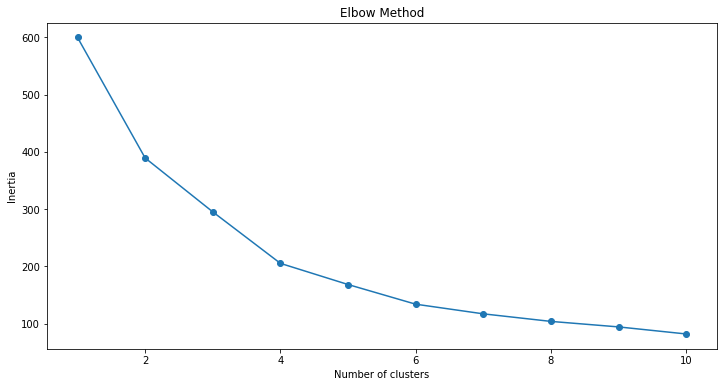

In [14]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

## Looks like the 'elbow' is at no. of clusters = 4 to 6

In [15]:
# Clustering silhouette_score
for n_cluster in range(2, 11):
 kmeans = KMeans(n_clusters=n_cluster).fit(df_scaled)
 label = kmeans.labels_
 sil_coeff = silhouette_score(df_scaled.values, label, metric='euclidean')
 print("For n_clusters={}, The Silhouette Coefficient is {}".format(
 n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.33547192894004574
For n_clusters=3, The Silhouette Coefficient is 0.357793388710272
For n_clusters=4, The Silhouette Coefficient is 0.4039582785148566
For n_clusters=5, The Silhouette Coefficient is 0.41664341513732767
For n_clusters=6, The Silhouette Coefficient is 0.4268547747113388
For n_clusters=7, The Silhouette Coefficient is 0.41749371992606155
For n_clusters=8, The Silhouette Coefficient is 0.4100960228678141
For n_clusters=9, The Silhouette Coefficient is 0.393790580883
For n_clusters=10, The Silhouette Coefficient is 0.39954962427664414


## From the silhouette score, it seems that 6 clusters are most ideal, so we will go with that.

In [16]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)
y_kmeans

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 1,
       0, 2, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 5, 1, 5, 4, 5, 4, 5, 4, 5,
       1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5])

In [17]:
# Visualising the 6 different groups of customers
df_scaled_new = df_scaled
df_scaled_new['label']=kmeans.labels_
polar=df_scaled_new.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig2 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1000, title="Line polar chart to visualise the 6 different groups of customers")
fig2.show()

## From this polar line chart, we see 6 possible different types of customers.  
### label 0: 'The poor' These customers are middle aged adults, with very low annual income and very low spending score <br>  label 1: 'The conservative' These customers are young adults, with low annual income and low spending score <br>label 2: 'The overspender' These customers are young adults, with low annual income but very high spending score <br>  <br>label 4: 'The thrifty' These customers are middle-aged adults, with high annual income and very low spending score <br>  label 5: 'The rich' These customers are young adults, with very high annual income and very high spending score <br>   Labels 2 and 5 have the highest spending score.


In [18]:
# Size of each group
pie=df_scaled_new.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label', title='Size of each customer group')

### Size of each cluster/customer group seems to be fairly evenly distributed, with a larger number of customers belonging to label 3 (Older customers with medium annual income and spending score). <br>The mall can target its largest group of customers by selling more products that older adults would use. <br>However, the younger adults (label 2 and 5) are not to be neglected as well since they hold the highest spending scores. <br>Hence the mall should also offer products catered to a younger audience.

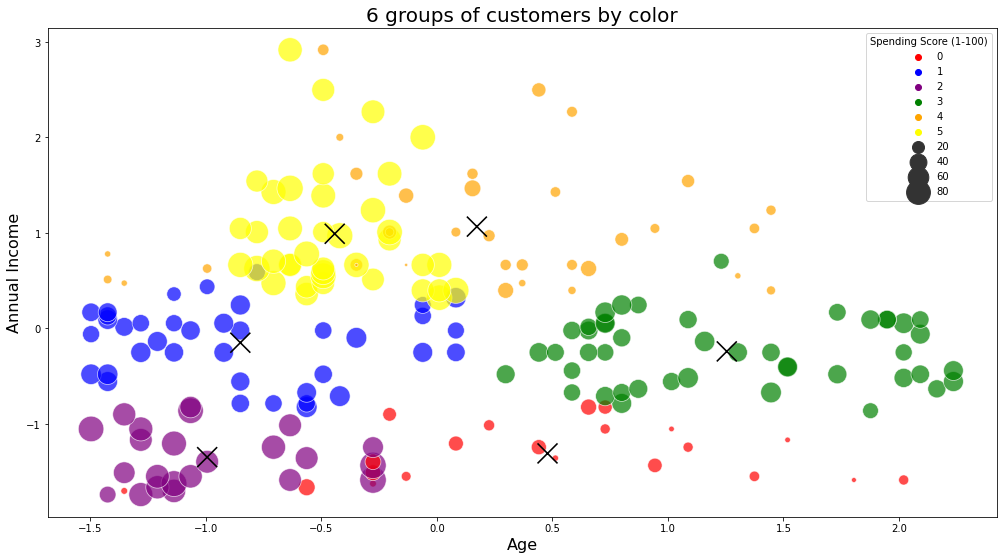

In [19]:
# '3D' scatterplot with spending score as size, grouped by color
fig, ax = plt.subplots(figsize=(17,9))
colors = ['red', 'blue', 'purple', 'green', 'orange', 'yellow']
ax = sns.scatterplot(x=df_scaled['Age'], y=df_scaled['Annual Income'], hue=kmeans.labels_, palette=colors, size=df['Spending Score (1-100)'], sizes=(10,700), alpha=0.7)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                     hue=range(6), palette=colors, s=400, ec='black', legend=False, ax=ax, marker='x')
plt.title('6 groups of customers by color', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)
plt.show()

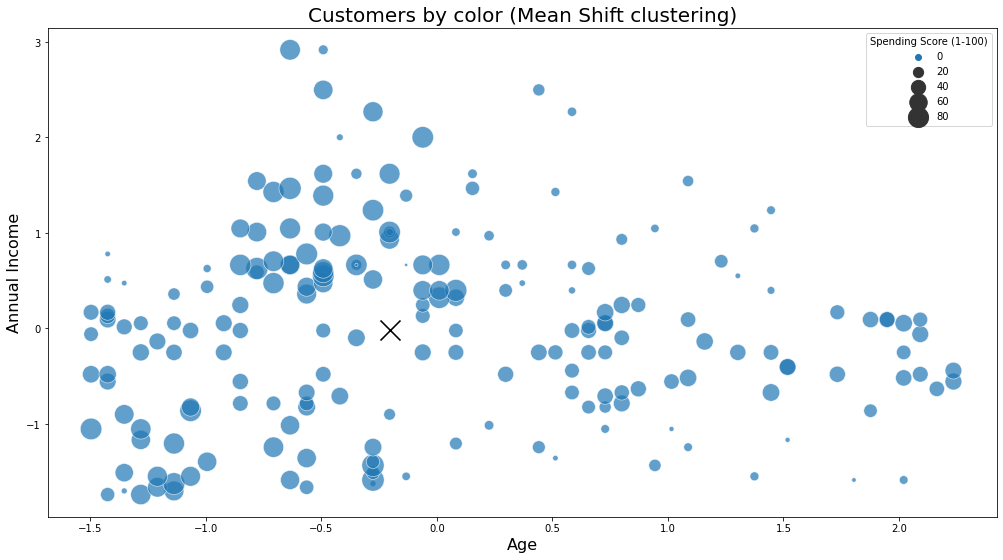

In [31]:
# Try Mean Shift Clustering
ms = MeanShift()
ms.fit(df_scaled)
cluster_centers = ms.cluster_centers_

fig, ax = plt.subplots(figsize=(17,9))
ax = sns.scatterplot(x=df_scaled['Age'], y=df_scaled['Annual Income'], hue=ms.labels_, size=df['Spending Score (1-100)'], sizes=(10,500), alpha=0.7)
ax = sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1],
                      s=400, ec='black', legend=False, ax=ax, marker='x')
plt.title('Customers by color (Mean Shift clustering)', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)
plt.show()

## We see that the algorithm only found 1 group of customers.

In [33]:
# Visualising the 1 group of customers
df_scaled_new2 = df_scaled
df_scaled_new2['label']=ms.labels_
polar=df_scaled_new2.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig5 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1000, title="Line polar chart to visualise the 1 group of customers")
fig5.show()

## From this polar line chart, we only see 1 possible cluster of customers, those with low annual income, high spending score and older adults. Clearly this is not representative of the different groups of customers.


# Conclusion
### It appears that kmeans clustering performed better than mean shift clustering on this dataset. From there we see 6 distinct groups of mall customers.  <br> I recommend the mall target both its older customers and younger ones, as these 2 groups form the highest majority and spending power respectively.